# Compare the detection numbers by hour of STA-LTA and template matching 

In [62]:
# Import modules

from os.path import join, dirname   
from matplotlib.pyplot import show
from pandas import read_csv, to_datetime, DataFrame, Series

from utils_basic import ROOTDIR, INNER_STATIONS
from utils_sta_lta import plot_station_hourly_detections
from utils_cc import read_template_and_match, get_timewin_from_template_name

In [63]:
# Inputs
rootdir = ROOTDIR
sta_lta_dir = "detections_sta0.01s_lta0.20s_on5_off2"

tempname = "HighB16-22-01-27"
suffix_cc = "bandpass10-450hz_dur0.05s_mincc0.7_mindet1"

stations_highlight = ["A04", "A10", "B04", "B13", "B15"]

countmin = 10
countmax = 1e4

In [64]:
# Read the STA-LTA detection numbers
datapath = join(rootdir, sta_lta_dir, "hourly_detection_numbers.csv")
df = read_csv(datapath, na_values=["nan"], parse_dates=["hour"])

In [65]:
# Read the CC detections
timewin = get_timewin_from_template_name(tempname)
inpath = join(rootdir, timewin, f"ccmatches_{tempname}_{suffix_cc}.dat")
template_and_match = read_template_and_match(inpath)
matches = template_and_match.matches

match_times = matches.get_match_times()

In [66]:
# Bin the matches by hour
ser = Series(match_times)

# Step 2 & 3: Set the series as a DateTimeIndex and resample by hour
# If datetime_series is not the index, you can make it so by creating a DataFrame
datfra = DataFrame(index=ser)

# Now resample by hour and count
datfra = datfra.resample('H').size()



Saved /Volumes/OmanData/geophones_no_prefilt/data/detections_sta0.01s_lta0.20s_on5_off2/sta_lta_vs_cc_detect_HighB16-22-01-27_bandpass10-450hz_dur0.05s_mincc0.7_mindet1.png


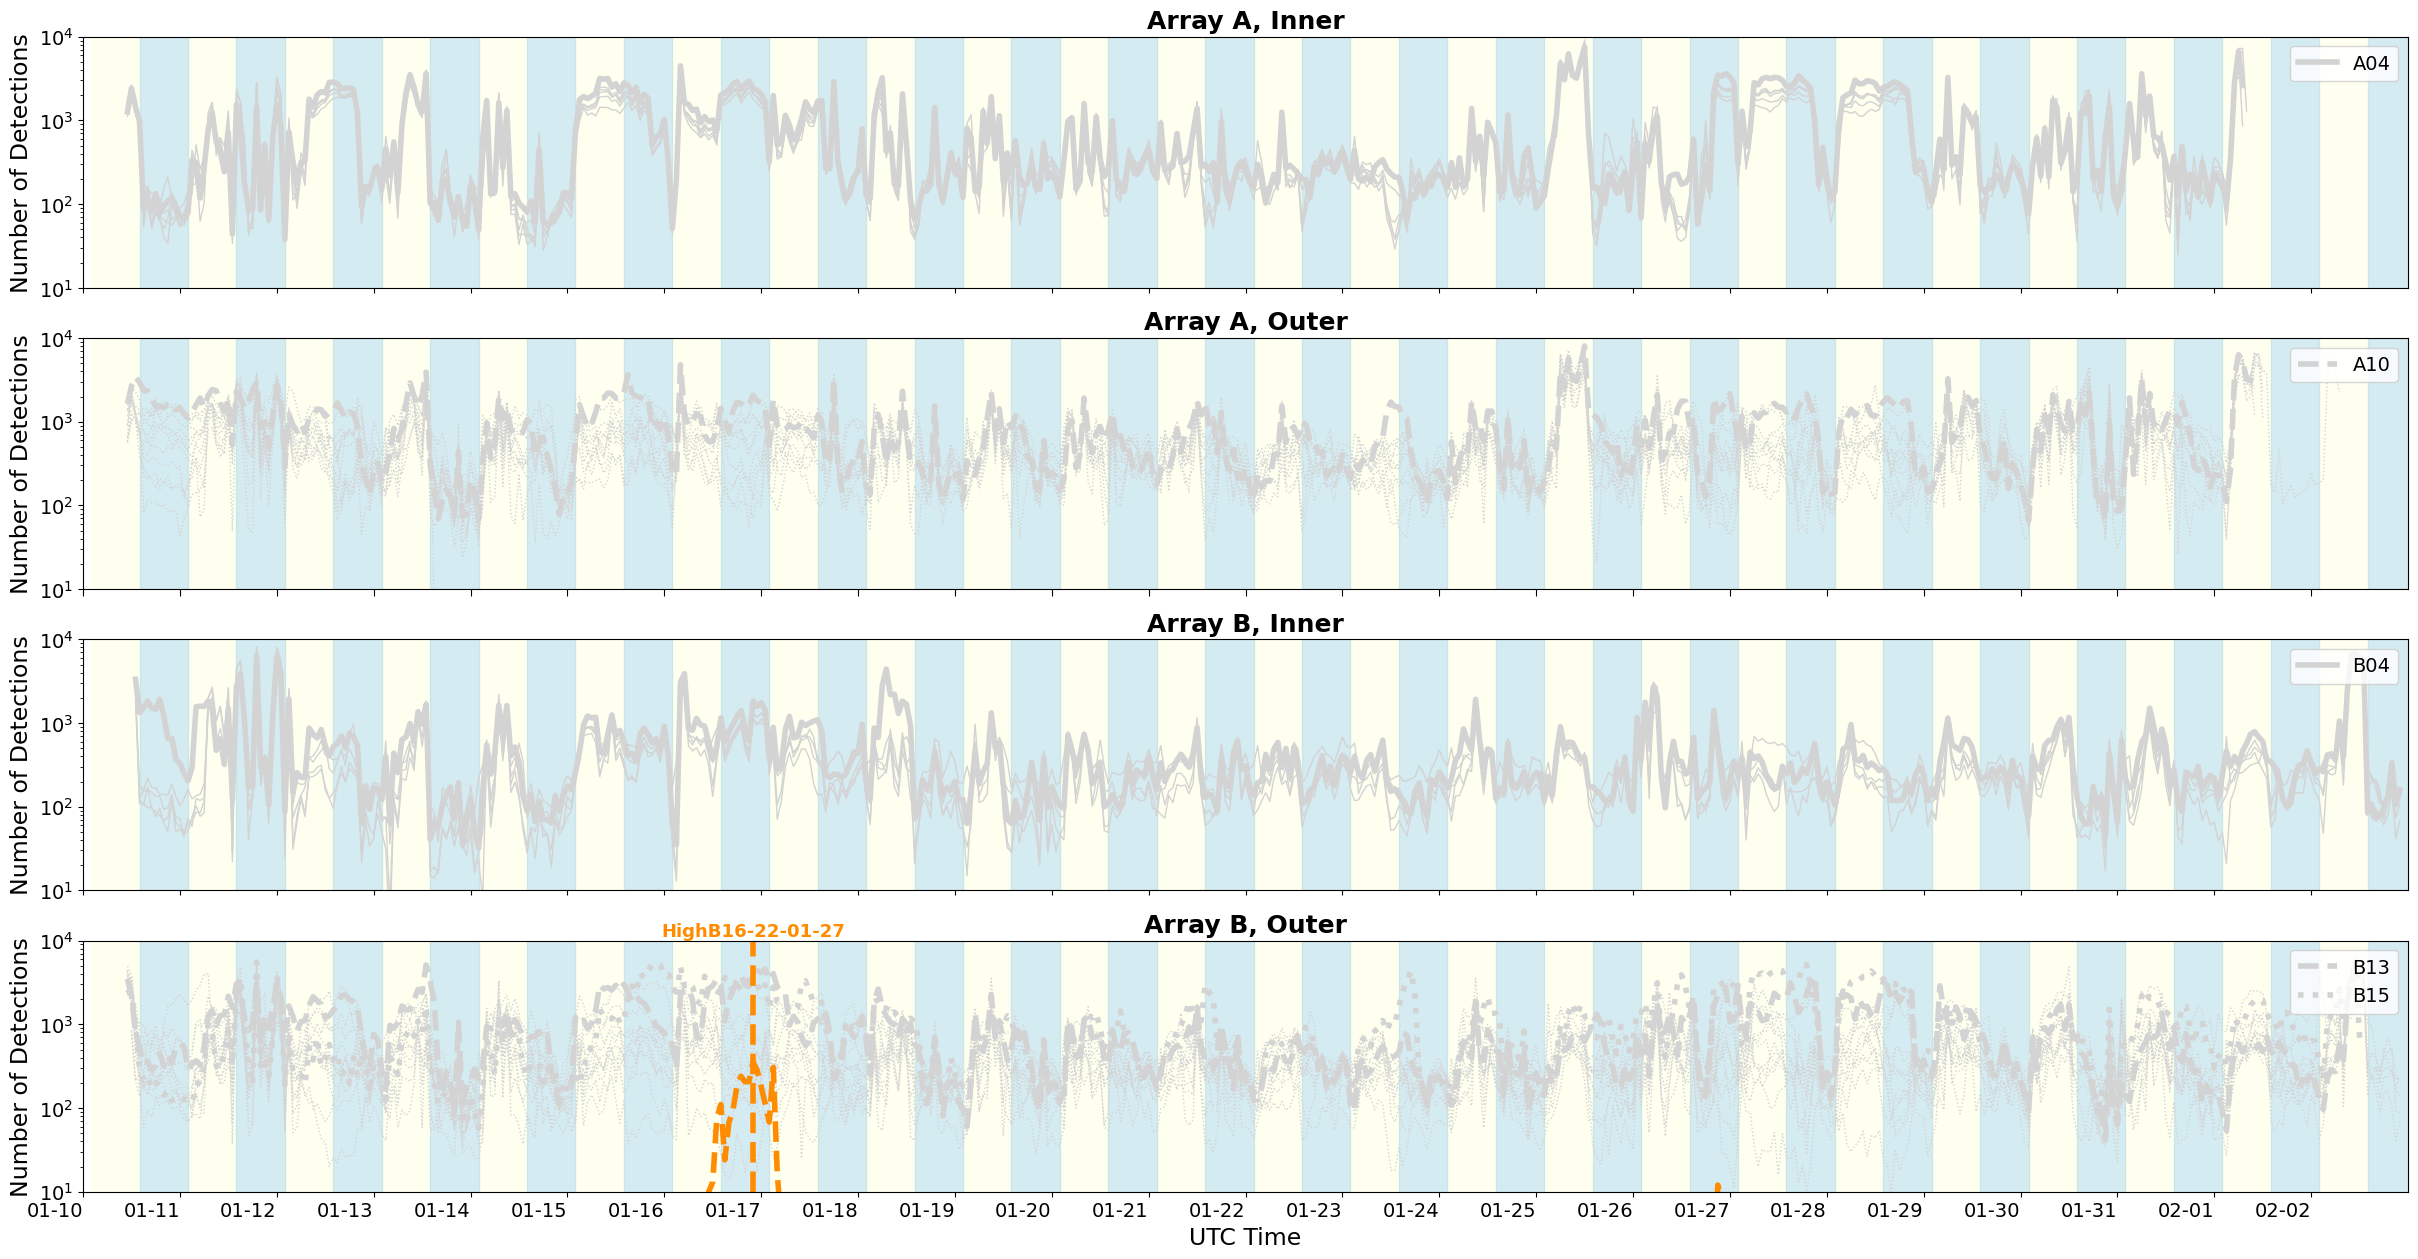

In [67]:
# Plot the STA-LTA and CC detections
fig, axes = plot_station_hourly_detections(df, individual_color=False, days_and_nights=True, stations_highlight=stations_highlight, log=True)
#axes[0].plot(datfra.index, datfra.values, color="dodgerblue", label=tempname, linewidth=4)
#axes[2].plot(datfra.index, datfra.values, color="darkorange", label=tempname, linewidth=4)
axes[3].plot(datfra.index, datfra.values, color="darkorange", label=tempname, linewidth=4, linestyle="--")

temptime = to_datetime(timewin, format="%Y-%m-%d-%H-%M-%S")
# axes[0].axvline(temptime, color="dodgerblue", linestyle="--", linewidth=4)
# axes[0].annotate(tempname, xy=(temptime, countmax), xytext=(temptime, countmax), color="dodgerblue", fontsize=13, fontweight="bold", ha="center", va="bottom")
# axes[2].axvline(temptime, color="darkorange", linestyle="--", linewidth=4)
# axes[2].annotate(tempname, xy=(temptime, countmax), xytext=(temptime, countmax), color="darkorange", fontsize=13, fontweight="bold", ha="center", va="bottom")
axes[3].axvline(temptime, color="darkorange", linestyle="--", linewidth=4)
axes[3].annotate(tempname, xy=(temptime, countmax), xytext=(temptime, countmax), color="darkorange", fontsize=13, fontweight="bold", ha="center", va="bottom")

for ax in axes:
    ax.set_ylim(countmin, countmax)

# Save the figure
figname = f"sta_lta_vs_cc_detect_{tempname}_{suffix_cc}.png"
fig.patch.set_alpha(0)

outpath = join(rootdir, sta_lta_dir, figname)
fig.savefig(outpath, dpi=300)
print(f"Saved {outpath}")